In [ ]:
# Points to be remembered

# Input -> L, nx, val_0 to val_49 (ID is a useless feature and hence can be removed)
# Output -> val_50 to last val

# length values are very small (between 0-2 utmost) while rest aremore than 50 and some are even in 10s. 
# So values must be scaled down into a particular range.
# No categorical values. No need of encoding
# Check for outliers
# VVVIMP => The number of dimensions are very large and all the dimensions are important in making predictions (curse of dimensionality)

In [206]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

In [7]:
os.chdir('train')
os.listdir()

['dataset_0.csv',
 'dataset_1.csv',
 'dataset_10.csv',
 'dataset_11.csv',
 'dataset_12.csv',
 'dataset_13.csv',
 'dataset_14.csv',
 'dataset_15.csv',
 'dataset_16.csv',
 'dataset_17.csv',
 'dataset_18.csv',
 'dataset_19.csv',
 'dataset_2.csv',
 'dataset_20.csv',
 'dataset_21.csv',
 'dataset_22.csv',
 'dataset_23.csv',
 'dataset_24.csv',
 'dataset_3.csv',
 'dataset_4.csv',
 'dataset_5.csv',
 'dataset_6.csv',
 'dataset_7.csv',
 'dataset_8.csv',
 'dataset_9.csv']

In [18]:
df = pd.read_csv(os.listdir()[0])
for i in os.listdir()[1:]:
    temp = pd.read_csv(i)
    df = pd.concat([df,temp],axis=0,ignore_index=True)

In [27]:
df2 = df.copy()

In [29]:
df2 = df2.drop(['ID','nx'],axis="columns")

In [264]:
input_data_normal = df2.iloc[:,0:51]
output_data_normal = df2.iloc[:,51:]

In [265]:
X_n = input_data_normal.values
y_n = output_data_normal.values

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

In [267]:
X_train_reshaped = np.expand_dims(X_train, axis=1)
X_test_reshaped = np.expand_dims(X_test, axis=1)

In [272]:
model = Sequential([
    Bidirectional(GRU(64, activation='relu'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(y_train.shape[1])  # Output layer with the same shape as the output data
])

NameError: name 'GRU' is not defined

In [269]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [270]:
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
63/63 [==============================] - 8s 20ms/step - loss: 730.3245 - mae: 20.5722 - val_loss: 233.7709 - val_mae: 11.8583
Epoch 2/100
63/63 [==============================] - 0s 6ms/step - loss: 225.3964 - mae: 11.6389 - val_loss: 225.1129 - val_mae: 11.5925
Epoch 3/100
63/63 [==============================] - 0s 6ms/step - loss: 202.0213 - mae: 10.9599 - val_loss: 175.7183 - val_mae: 10.1844
Epoch 4/100
63/63 [==============================] - 0s 6ms/step - loss: 153.1634 - mae: 9.5361 - val_loss: 149.9073 - val_mae: 9.4204
Epoch 5/100
63/63 [==============================] - 0s 6ms/step - loss: 143.1437 - mae: 9.2650 - val_loss: 144.0071 - val_mae: 9.2506
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 140.7585 - mae: 9.1943 - val_loss: 141.6058 - val_mae: 9.1708
Epoch 7/100
63/63 [==============================] - 0s 5ms/step - loss: 137.4477 - mae: 9.0824 - val_loss: 135.3456 - val_mae: 8.9590
Epoch 8/100
63/63 [=============================

Epoch 62/100
63/63 [==============================] - 0s 6ms/step - loss: 44.6707 - mae: 4.8430 - val_loss: 46.0353 - val_mae: 4.9350
Epoch 63/100
63/63 [==============================] - 0s 6ms/step - loss: 44.6554 - mae: 4.8470 - val_loss: 46.0732 - val_mae: 4.9374
Epoch 64/100
63/63 [==============================] - 0s 6ms/step - loss: 44.6384 - mae: 4.8442 - val_loss: 46.2243 - val_mae: 4.9468
Epoch 65/100
63/63 [==============================] - 0s 6ms/step - loss: 44.6870 - mae: 4.8482 - val_loss: 45.9073 - val_mae: 4.9272
Epoch 66/100
63/63 [==============================] - 0s 6ms/step - loss: 44.6602 - mae: 4.8479 - val_loss: 46.0483 - val_mae: 4.9387
Epoch 67/100
63/63 [==============================] - 0s 7ms/step - loss: 44.4998 - mae: 4.8371 - val_loss: 45.6167 - val_mae: 4.9075
Epoch 68/100
63/63 [==============================] - 0s 6ms/step - loss: 44.5499 - mae: 4.8389 - val_loss: 45.9121 - val_mae: 4.9259
Epoch 69/100
63/63 [==============================] - 0s 6ms/s

In [271]:
loss, mae = model.evaluate(X_test_reshaped, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

16/16 [==============================] - 0s 3ms/step - loss: 45.3845 - mae: 4.8997
Test Mean Absolute Error: 4.90


### Applying standardization on df2

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [96]:
df2

,L,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,...,val_2540,val_2541,val_2542,val_2543,val_2544,val_2545,val_2546,val_2547,val_2548,val_2549
0,0.26,37.43,51.64,58.52,68.75,79.26,89.49,92.69,99.33,88.85,...,14.92,15.37,13.14,11.47,9.21,9.20,7.96,14.91,8.11,6.98
1,1.03,40.71,77.72,97.93,99.30,75.48,43.31,17.55,6.70,9.78,...,51.17,43.19,46.55,42.27,39.16,40.88,34.95,35.86,30.92,32.87
2,0.30,39.14,51.81,64.71,72.83,81.87,89.72,97.15,97.20,98.25,...,15.42,16.94,31.77,26.58,32.49,35.80,41.43,47.15,56.64,62.85
3,0.44,29.00,50.13,70.23,84.54,95.18,101.64,108.12,93.70,84.31,...,14.18,10.94,16.33,17.30,18.33,23.44,28.95,27.78,37.10,45.29
4,0.82,39.19,77.75,100.27,106.94,76.69,45.25,14.67,-0.93,5.16,...,45.99,43.87,45.96,42.59,40.91,41.83,42.75,45.90,43.62,46.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.10,42.72,84.67,106.39,82.52,44.08,9.14,0.02,25.17,42.01,...,40.36,46.36,40.50,38.74,45.21,43.14,51.27,38.40,34.52,34.75
2496,0.65,40.64,70.40,89.93,101.84,89.61,72.32,42.05,21.42,3.19,...,38.22,37.18,36.22,33.38,36.02,34.18,31.69,28.01,32.83,27.08
2497,0.76,36.30,72.99,89.83,100.03,93.42,77.79,55.88,37.23,29.14,...,44.66,38.97,35.70,37.26,34.37,27.68,24.24,16.19,11.47,3.12
2498,1.18,40.46,85.19,99.46,73.57,30.43,0.56,7.36,36.77,59.08,...,37.48,40.82,44.84,45.83,45.41,46.51,44.13,44.37,45.28,42.12


In [150]:
scaler = StandardScaler()
df2_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

In [151]:
df2_scaled

,L,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,...,val_2540,val_2541,val_2542,val_2543,val_2544,val_2545,val_2546,val_2547,val_2548,val_2549
0,-1.471639,0.451268,-0.981959,-1.644727,-1.583343,-0.018995,0.721177,1.021599,1.396687,1.249084,...,-1.660140,-1.636121,-1.861904,-2.017548,-2.244429,-2.221970,-2.243938,-1.485195,-1.775986,-1.537507
1,1.156312,0.927160,0.879805,0.808805,0.874503,-0.199030,-0.752100,-1.116045,-1.279336,-1.145428,...,1.600974,0.863347,1.162999,0.762823,0.485990,0.613639,0.077284,0.150093,-0.210909,-0.068046
2,-1.335122,0.699370,-0.969824,-1.259359,-1.255094,0.105314,0.728514,1.148481,1.335153,1.533748,...,-1.615160,-1.495065,-0.175165,-0.653541,-0.122087,0.158939,0.634584,1.031352,1.553832,1.633556
3,-0.857313,-0.771834,-1.089753,-0.915702,-0.312987,0.739245,1.108797,1.460565,1.234040,1.111597,...,-1.726712,-2.034131,-1.573085,-1.491263,-1.412996,-0.947378,-0.438734,-0.480605,0.213123,0.636887
4,0.439598,0.706625,0.881947,0.954486,1.489165,-0.141399,-0.690209,-1.197978,-1.499762,-1.285337,...,1.134972,0.924441,1.109581,0.791710,0.645530,0.698672,0.748108,0.933782,0.660483,0.702726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.395217,1.218790,1.375942,1.335496,-0.475502,-1.694554,-1.842223,-1.614753,-0.745750,-0.169393,...,0.628487,1.148154,0.615239,0.444163,1.037544,0.815927,1.480854,0.348357,0.036100,0.038659
2496,-0.140599,0.917004,0.357255,0.310752,1.078854,0.473956,0.173403,-0.419049,-0.854085,-1.344996,...,0.435969,0.323383,0.227733,-0.039693,0.199729,0.013936,-0.203086,-0.462652,-0.079857,-0.396674
2497,0.234823,0.287317,0.542146,0.304527,0.933233,0.655420,0.347912,-0.025602,-0.397344,-0.559140,...,1.015323,0.484204,0.180652,0.310561,0.049305,-0.567865,-0.843808,-1.385282,-1.545444,-1.756593
2498,1.668251,0.890888,1.413064,0.904058,-1.195559,-2.344678,-2.115950,-1.405939,-0.410633,0.347546,...,0.369397,0.650416,1.008177,1.084190,1.055777,1.117569,0.866792,0.814355,0.774382,0.456965


In [257]:
input_data = df2_scaled.iloc[:,0:51]
output_data = df2_scaled.iloc[:,51:]

In [258]:
X_s = input_data.values
y_s = output_data.values

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

In [260]:
X_train_reshaped = np.expand_dims(X_train, axis=1)
X_test_reshaped = np.expand_dims(X_test, axis=1)

In [261]:
model = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(y_train.shape[1])  # Output layer with the same shape as the output data
])

In [262]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [263]:
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/50
63/63 [==============================] - 8s 20ms/step - loss: 0.9052 - mae: 0.7648 - val_loss: 0.7293 - val_mae: 0.6801
Epoch 2/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6193 - mae: 0.6245 - val_loss: 0.5551 - val_mae: 0.5804
Epoch 3/50
63/63 [==============================] - 0s 6ms/step - loss: 0.4681 - mae: 0.5338 - val_loss: 0.4214 - val_mae: 0.5005
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 0.3649 - mae: 0.4660 - val_loss: 0.3450 - val_mae: 0.4505
Epoch 5/50
63/63 [==============================] - 0s 6ms/step - loss: 0.3026 - mae: 0.4224 - val_loss: 0.2896 - val_mae: 0.4119
Epoch 6/50
63/63 [==============================] - 0s 6ms/step - loss: 0.2653 - mae: 0.3919 - val_loss: 0.2547 - val_mae: 0.3822
Epoch 7/50
63/63 [==============================] - 0s 6ms/step - loss: 0.2369 - mae: 0.3672 - val_loss: 0.2340 - val_mae: 0.3643
Epoch 8/50
63/63 [==============================] - 0s 6ms/step - loss: 0.2219 - mae: 0.3

In [107]:
loss, mae = model.evaluate(X_test_reshaped, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

16/16 [==============================] - 0s 4ms/step - loss: 0.0490 - mae: 0.1595
Test Mean Absolute Error: 0.16


### Applying Normalization on df2

In [182]:
df3 = df.copy()
df3 = df3.drop(['ID','nx'],axis="columns")

In [183]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [184]:
scaler = MinMaxScaler()
df3_normalized = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)

In [185]:
df3_normalized

,L,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,...,val_2540,val_2541,val_2542,val_2543,val_2544,val_2545,val_2546,val_2547,val_2548,val_2549
0,0.06,0.516954,0.357050,0.324660,0.409142,0.695532,0.817592,0.849548,0.911522,0.827050,...,0.203091,0.201938,0.179735,0.155273,0.166620,0.160119,0.139391,0.249015,0.145765,0.130225
1,0.83,0.579087,0.696280,0.829787,0.834866,0.659363,0.428511,0.214437,0.156161,0.158664,...,0.694550,0.561370,0.609888,0.563328,0.581440,0.551520,0.460395,0.491773,0.387576,0.375071
2,0.10,0.549346,0.359261,0.403999,0.465998,0.720505,0.819530,0.887245,0.894153,0.906509,...,0.209870,0.222222,0.419596,0.355458,0.489058,0.488757,0.537464,0.622596,0.660235,0.658597
3,0.24,0.357265,0.337409,0.474750,0.629181,0.847861,0.919960,0.979968,0.865612,0.788673,...,0.193059,0.144703,0.220806,0.232512,0.292936,0.336051,0.389034,0.398146,0.453090,0.492529
4,0.62,0.550294,0.696670,0.859780,0.941332,0.670941,0.444856,0.190094,0.093941,0.119611,...,0.624322,0.570155,0.602292,0.567568,0.605679,0.563257,0.553164,0.608111,0.522209,0.503499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.90,0.617162,0.786681,0.938221,0.601031,0.358913,0.140618,0.066267,0.306776,0.431107,...,0.547993,0.602326,0.531994,0.516561,0.665235,0.579442,0.654496,0.521205,0.425739,0.392850
2496,0.45,0.577761,0.601067,0.727249,0.870262,0.794565,0.672929,0.421520,0.276197,0.102959,...,0.518980,0.483721,0.476889,0.445548,0.537950,0.468742,0.421622,0.400811,0.407824,0.320314
2497,0.56,0.495548,0.634755,0.725968,0.845039,0.831021,0.719016,0.538416,0.405121,0.322316,...,0.606291,0.506848,0.470194,0.496953,0.515097,0.388436,0.333016,0.263847,0.181385,0.093720
2498,0.98,0.574351,0.793444,0.849398,0.476310,0.228304,0.068329,0.128307,0.401370,0.575402,...,0.508948,0.530749,0.587872,0.610493,0.668006,0.621077,0.569577,0.590382,0.539807,0.462550


In [249]:
input_data_n = df3_normalized.iloc[:,0:51]
output_data_n = df3_normalized.iloc[:,51:]

In [250]:
X = input_data_n.values
y = output_data_n.values

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
X_train_reshaped = np.expand_dims(X_train, axis=1)
X_test_reshaped = np.expand_dims(X_test, axis=1)

In [254]:
model = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(y_train.shape[1])  # Output layer with the same shape as the output data
])

In [255]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [256]:
history = model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/500
63/63 [==============================] - 11s 24ms/step - loss: 0.1143 - mae: 0.2736 - val_loss: 0.0273 - val_mae: 0.1284
Epoch 2/500
63/63 [==============================] - 0s 7ms/step - loss: 0.0257 - mae: 0.1246 - val_loss: 0.0256 - val_mae: 0.1254
Epoch 3/500
63/63 [==============================] - 0s 7ms/step - loss: 0.0250 - mae: 0.1236 - val_loss: 0.0241 - val_mae: 0.1208
Epoch 4/500
63/63 [==============================] - 0s 6ms/step - loss: 0.0200 - mae: 0.1109 - val_loss: 0.0171 - val_mae: 0.1031
Epoch 5/500
63/63 [==============================] - 0s 6ms/step - loss: 0.0163 - mae: 0.1006 - val_loss: 0.0163 - val_mae: 0.1000
Epoch 6/500
63/63 [==============================] - 0s 6ms/step - loss: 0.0160 - mae: 0.0993 - val_loss: 0.0163 - val_mae: 0.0997
Epoch 7/500
63/63 [==============================] - 0s 6ms/step - loss: 0.0159 - mae: 0.0990 - val_loss: 0.0162 - val_mae: 0.0994
Epoch 8/500
63/63 [==============================] - 0s 6ms/step - loss: 0.0158 -

63/63 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0649 - val_loss: 0.0074 - val_mae: 0.0651
Epoch 64/500
63/63 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0647 - val_loss: 0.0076 - val_mae: 0.0658
Epoch 65/500
63/63 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0648 - val_loss: 0.0074 - val_mae: 0.0650
Epoch 66/500
63/63 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0647 - val_loss: 0.0074 - val_mae: 0.0649
Epoch 67/500
63/63 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0648 - val_loss: 0.0075 - val_mae: 0.0656
Epoch 68/500
63/63 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0648 - val_loss: 0.0074 - val_mae: 0.0649
Epoch 69/500
63/63 [==============================] - 0s 6ms/step - loss: 0.0073 - mae: 0.0648 - val_loss: 0.0074 - val_mae: 0.0649
Epoch 70/500
63/63 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0

KeyboardInterrupt: 

In [201]:
loss, mae = model.evaluate(X_test_reshaped, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

16/16 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0256
Test Mean Absolute Error: 0.03


In [202]:
model.save('bilstm_model.h5')

C:\Users\SHARVIN JOSHI\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Creating validation df

In [235]:
os.getcwd()

'C:\\Users\\SHARVIN JOSHI\\Machine learning\\GDSC Round-3 Selection Kaggle Competition\\valid'

In [236]:
os.chdir('C:\\Users\\SHARVIN JOSHI\\Machine learning\\GDSC Round-3 Selection Kaggle Competition\\valid')

In [237]:
df_valid = pd.read_csv(os.listdir()[1])

In [238]:
for i in os.listdir()[2:]:
    temp = pd.read_csv(i)
    df_valid = pd.concat([df_valid,temp],axis=0,ignore_index=True)

In [239]:
df_valid

,ID,L,nx,val_0,val_1,val_2,val_3,val_4,val_5,val_6,...,val_2540,val_2541,val_2542,val_2543,val_2544,val_2545,val_2546,val_2547,val_2548,val_2549
0,0,0.34,50,36.49,55.92,70.94,89.70,91.27,98.53,98.25,...,32.73,31.12,30.45,24.92,28.33,31.57,35.87,37.55,36.87,35.40
1,1,1.10,50,31.78,75.30,98.59,96.17,76.22,37.54,28.87,...,48.41,39.01,37.26,37.80,35.56,36.36,36.27,19.56,23.43,13.98
2,2,0.68,50,41.52,68.43,91.76,99.00,95.98,81.40,57.53,...,47.65,48.23,48.31,50.08,49.59,42.77,48.08,32.77,26.47,16.23
3,3,0.29,50,42.08,53.85,63.82,75.85,84.90,91.06,97.15,...,47.77,44.82,43.29,43.83,32.02,29.55,23.51,18.13,16.72,9.49
4,4,0.99,50,28.93,75.68,99.51,94.99,65.31,20.49,5.83,...,28.83,29.52,27.91,41.56,31.70,42.24,37.33,31.62,32.73,21.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95,0.67,50,42.71,64.20,82.97,96.12,99.44,92.94,80.05,...,33.49,36.62,38.36,41.48,46.90,47.46,50.01,54.84,51.33,48.30
996,96,0.39,50,29.83,50.25,71.66,84.05,96.28,100.58,100.29,...,29.20,29.39,27.50,24.05,20.77,12.21,25.54,24.31,15.33,14.48
997,97,0.85,50,28.45,69.83,99.57,98.18,81.12,47.42,17.84,...,32.24,38.27,29.99,27.51,26.60,24.63,27.63,28.58,42.71,42.38
998,98,0.94,50,40.39,79.00,98.98,90.31,54.52,19.23,-1.98,...,40.18,38.19,31.44,26.28,20.79,27.85,34.05,46.43,57.39,70.94


In [240]:
df_valid = df_valid.drop(['ID','nx'],axis="columns")

In [241]:
df_valid

,L,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,...,val_2540,val_2541,val_2542,val_2543,val_2544,val_2545,val_2546,val_2547,val_2548,val_2549
0,0.34,36.49,55.92,70.94,89.70,91.27,98.53,98.25,104.67,92.97,...,32.73,31.12,30.45,24.92,28.33,31.57,35.87,37.55,36.87,35.40
1,1.10,31.78,75.30,98.59,96.17,76.22,37.54,28.87,20.97,30.08,...,48.41,39.01,37.26,37.80,35.56,36.36,36.27,19.56,23.43,13.98
2,0.68,41.52,68.43,91.76,99.00,95.98,81.40,57.53,42.92,39.57,...,47.65,48.23,48.31,50.08,49.59,42.77,48.08,32.77,26.47,16.23
3,0.29,42.08,53.85,63.82,75.85,84.90,91.06,97.15,100.05,101.67,...,47.77,44.82,43.29,43.83,32.02,29.55,23.51,18.13,16.72,9.49
4,0.99,28.93,75.68,99.51,94.99,65.31,20.49,5.83,2.22,14.40,...,28.83,29.52,27.91,41.56,31.70,42.24,37.33,31.62,32.73,21.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.67,42.71,64.20,82.97,96.12,99.44,92.94,80.05,59.15,37.79,...,33.49,36.62,38.36,41.48,46.90,47.46,50.01,54.84,51.33,48.30
996,0.39,29.83,50.25,71.66,84.05,96.28,100.58,100.29,91.50,82.95,...,29.20,29.39,27.50,24.05,20.77,12.21,25.54,24.31,15.33,14.48
997,0.85,28.45,69.83,99.57,98.18,81.12,47.42,17.84,1.78,0.41,...,32.24,38.27,29.99,27.51,26.60,24.63,27.63,28.58,42.71,42.38
998,0.94,40.39,79.00,98.98,90.31,54.52,19.23,-1.98,1.47,16.79,...,40.18,38.19,31.44,26.28,20.79,27.85,34.05,46.43,57.39,70.94


In [242]:
df_valid_scaled = pd.DataFrame(scaler.fit_transform(df_valid), columns=df_valid.columns)

In [243]:
df_valid_scaled

,L,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,...,val_2540,val_2541,val_2542,val_2543,val_2544,val_2545,val_2546,val_2547,val_2548,val_2549
0,0.14,0.539545,0.410731,0.493523,0.675115,0.809820,0.907588,0.909290,0.959045,0.859118,...,0.437570,0.506222,0.431442,0.344438,0.373474,0.433056,0.459040,0.466756,0.423374,0.413687
1,0.90,0.429007,0.663107,0.848147,0.773893,0.661441,0.356640,0.323855,0.265130,0.332048,...,0.658540,0.623111,0.536714,0.526256,0.473779,0.498430,0.464176,0.246883,0.272921,0.200934
2,0.48,0.657592,0.573642,0.760549,0.817099,0.856256,0.752846,0.565691,0.447107,0.411582,...,0.647830,0.759704,0.707528,0.699605,0.668424,0.585915,0.615819,0.408335,0.306952,0.223282
3,0.09,0.670735,0.383774,0.402206,0.463664,0.747018,0.840108,0.900008,0.920743,0.932032,...,0.649521,0.709185,0.629927,0.611378,0.424667,0.405487,0.300334,0.229406,0.197806,0.156337
4,0.79,0.362122,0.668056,0.859946,0.755878,0.553880,0.202620,0.129441,0.109683,0.200637,...,0.382610,0.482519,0.392178,0.579334,0.420228,0.578682,0.477786,0.394280,0.377029,0.278208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.47,0.685520,0.518557,0.647813,0.773130,0.890368,0.857091,0.755717,0.581661,0.396664,...,0.448281,0.587704,0.553718,0.578204,0.631104,0.649925,0.640601,0.678074,0.585246,0.541816
996,0.19,0.383243,0.336893,0.502757,0.588855,0.859213,0.926107,0.926504,0.849859,0.775142,...,0.387824,0.480593,0.385840,0.332157,0.268590,0.168828,0.326400,0.304938,0.182246,0.205900
997,0.65,0.350857,0.591874,0.860716,0.804580,0.709751,0.445890,0.230782,0.106035,0.083389,...,0.430665,0.612148,0.424331,0.380999,0.349473,0.338338,0.353236,0.357125,0.488750,0.483015
998,0.74,0.631073,0.711291,0.853149,0.684427,0.447501,0.191238,0.063539,0.103465,0.220667,...,0.542559,0.610963,0.446746,0.363636,0.268868,0.382285,0.435670,0.575287,0.653084,0.766687


In [244]:
validation_inputs = df_valid_scaled.iloc[:,0:51]
validation_outputs = df_valid_scaled.iloc[:,51:]

In [245]:
validation_inputs_reshaped = np.expand_dims(validation_inputs, axis=1)

In [246]:
validation_predictions = model.predict(validation_inputs_reshaped)

32/32 [==============================] - 0s 3ms/step


In [247]:
mae = mean_absolute_error(validation_outputs, validation_predictions)
mse = mean_squared_error(validation_outputs, validation_predictions)
print(f"Validation Mean Absolute Error: {mae:.4f}")
print(f"Validation Mean Squared Error: {mse:.4f}")

Validation Mean Absolute Error: 0.0399
Validation Mean Squared Error: 0.0027


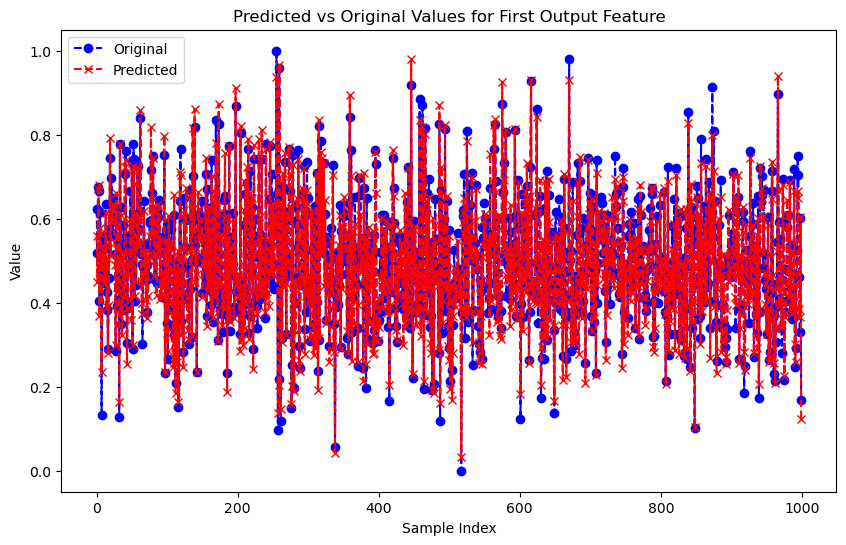

In [248]:
plt.figure(figsize=(10, 6))
plt.plot(validation_outputs.iloc[:, 0], label='Original', color='b', marker='o', linestyle='dashed')
plt.plot(validation_predictions[:, 0], label='Predicted', color='r', marker='x', linestyle='dashed')
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Predicted vs Original Values for First Output Feature")
plt.legend()
plt.show()

## Making final CSV file